# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluatimg a model
5. Improve a model
6. Save and load a trainined model
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [3]:
# 1. Get the data ready

import pandas as pd 
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Basically we use x as the feture column that is every column except the Target column as that is our output column
# target=1 => Heart-disease
# target=0 => No Heart-disease

# Creating x (features matrix)
X = heart_disease.drop("target",axis=1)

# Creating y (labels)
y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
clf.fit(X_train,y_train);

In [8]:
# make a prediction
import numpy as np
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [9]:
y_test

218    0
89     1
168    0
124    1
61     1
      ..
301    0
54     1
147    1
39     1
68     1
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on  the training data and test data
clf.score(X_train,y_train)

1.0

In [11]:
clf.score(X_test,y_test)

0.8688524590163934

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.82      0.93      0.87        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [13]:
confusion_matrix(y_test,y_preds)

array([[26,  6],
       [ 2, 27]], dtype=int64)

In [14]:
accuracy_score(y_test,y_preds)

0.8688524590163934

In [15]:
# 5. Imrove a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 20 estimators...
Model accuracy on test set: 91.80%
 
Trying model with 30 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 40 estimators...
Model accuracy on test set: 91.80%
 
Trying model with 50 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 60 estimators...
Model accuracy on test set: 85.25%
 
Trying model with 70 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 80 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 90 estimators...
Model accuracy on test set: 88.52%
 


In [16]:
# 6. Save the model and load it
import pickle

pickle.dump(clf,open("data/random_forest_model__1.pkl","wb"))

In [17]:
load_model=pickle.load(open("data/random_forest_model__1.pkl","rb"))
load_model.score(X_test,y_test)

0.8852459016393442

In [18]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Getting the data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels (usually 'X' & 'y')
    2. Filling (also called imputing) or disregarding mising values
    3. Converting non-numerical values (also called feature encoding)

In [19]:
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [21]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [22]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [24]:
# Split the data into X & y
X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

#Split into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
# # Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
# model.fit(X_train,y_train)
# model.score(X_test,y_test)

In [26]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")

transformed_X=transformer.fit_transform(X)
pd.DataFrame(transformed_X)                 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [27]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [28]:
# Let's refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?
   
1. Fill them with some value(also known as imputation).
2. Remove the samples with missing values altogether.

In [29]:
#Importing the car sales missing data
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [30]:
# Create X and y
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [31]:
# Let's try and conver our data into numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")

transformed_X=transformer.fit_transform(X)
pd.DataFrame(transformed_X)    

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


### Option 1: Fill missing data with Pandas

In [32]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True) 

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True) 

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True) 

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True) 

In [33]:
#Check the DataFrame again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [34]:
# Remove rows with missing Price Value
car_sales_missing.dropna(inplace=True)
len(car_sales_missing)

950

In [35]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")

transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Filling missing data with Scikit-learn

In [36]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [38]:
# Split into X and y
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [39]:
# Filling missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# Define columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

# Create an imputer (Something that fills missing data)
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features),
])
 
# Transform the data
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [40]:
car_sales_filled=pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")

transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [42]:
# Now we've got out data as numbers and filled (no missing value)
#Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(transformed_X,
                                                y,
                                                test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for our problem.

Scikit-learn uses etimator as another term for machine learning model or algorithm.

* Classification - Predicting whether a sample is one thing or another
* Regression - predicting a number

### 2.1 Picking a machine learning model for a regression problem

In [43]:
# Import Boston housing dataset
from sklearn.datasets import load_boston

boston=load_boston()
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

C:\Users\adars\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
# How many samples?
len(boston_df)

506

In [45]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,
                                                y,
                                                test_size=0.2)

# Instantiate Ridge model
model=Ridge()
model.fit(X_train,y_train)

# Check the score of the rigid model on the test data
model.score(X_test,y_test)

0.6662221670168522

How do we improve the score?

What if Ridge wasn't working?

In [46]:
# Let's try the Random Forest Regressior
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,
                                                y,
                                                test_size=0.2)

# Instantiate Random Forest Regressor model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

# Check the score
rf.score(X_test,y_test)

0.8654448653350507

In [47]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

# Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf=LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf.score(X_test,y_test)

C:\Users\adars\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [49]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

# Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Classifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test,y_test)

0.8524590163934426

Tidbit:

    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [50]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

# Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Classifier
clf=RandomForestClassifier()

# Fit the model to the data (training machine learning model)
clf.fit(X_train,y_train)

# Evaluate the Random Forest Classifier ( use the patterns that the model has learned)
clf.score(X_test,y_test)

0.8524590163934426

#### Comment:
What the machine learning model does is find the pattern in the `.fit` section and then it trys to figure out or in supervised learning it figures out how those patterns are related to the labels

### 3.2 Make predictions using a machine learning model

There are 2 ways to make predictions:
1.  `predict()`
2.  `predict_proba()`

In [51]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [53]:
# Compare predictions to truth labels to evaluate the model
y_preds =clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [54]:
clf.score(X_test,y_test)

0.8524590163934426

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [56]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [57]:
# Let's predict on same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can alxo be used for regression models.

In [58]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X= boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit model
model=RandomForestRegressor().fit(X_train,y_train)

# Make predictions
y_preds=model.predict(X_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [59]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [60]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.136382352941176

## 4. Evaluating a madel

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions.


### 4.1 Evaluating the model with the `score` method

In [61]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target", axis =1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
clf.score(X_train,y_train)

1.0

In [63]:
clf.score(X_test,y_test)

0.8524590163934426

### 4.2 Evaluating the model with `scoring` parameter

In [64]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target", axis =1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train);

In [65]:
clf.score(X_test,y_test)

0.8524590163934426

In [66]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrices

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target", axis =1)
y=heart_disease["target"]

clf=RandomForestClassifier()

cross_val_score= cross_val_score(clf,X,y,cv=5)
np.mean(cross_val_score)

0.8248087431693989

In [68]:
print(f"Heart Disease Classifier Cross-Vaalidated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Vaalidated Accuracy: 82.48%


**Area under the reciever operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparision of a model's true positive rate (TPR) verses a model's false positive rate

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [69]:
# Create X test... etc
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [70]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train,y_train)

# Make predictions with probabilities

y_probs=clf.predict_proba(X_test)
y_probs[:10 ]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [71]:
y_probs_positives=y_probs[:, 1]
y_probs_positives[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [72]:
# Calculate fpr,tpr and thresholds
fpr,tpr,threshold=roc_curve(y_test,y_probs_positives)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

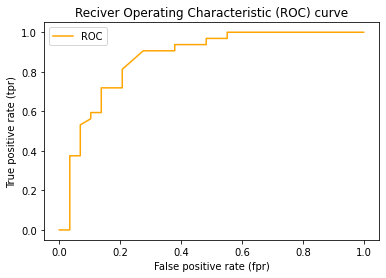

In [73]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plot a ROC curve given the false positive rate (fpr)
    and true positive plot (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # Plot line with no predective power (baseline)
    # plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [74]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positives)

0.8669181034482759

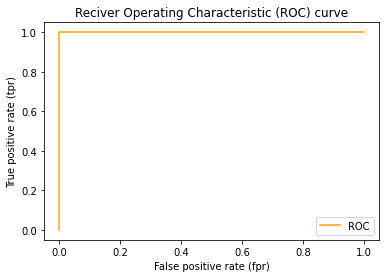

In [75]:
# Plot perfect ROC curve and AUC score
fpr,tpr,threshold=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [76]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [77]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [78]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [79]:
23+6+6+26,len(X_test)

(61, 61)

In [80]:
# How to install a conda package into the current enviroment from a Jupyter Notebook
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

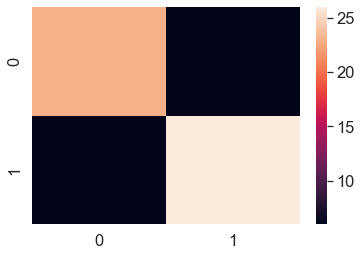

In [81]:
# Make our confusion matrix more visual with Seaborn's heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

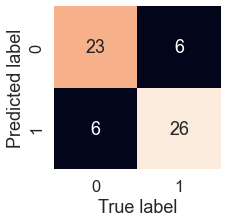

In [82]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn heatmap().
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with con_mat info
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");

plot_conf_mat(conf_mat)

### Classification Report

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### 4.2.2 Regression model evaluation metrics

1. R^2 (pronuanced r-square) or coefficient of determination.
2. Mean absolute error (MAE)
2. Mean square error (MSE)

**R^2**

What R-square does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.

**For example,**
if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model prefectly predicts the range of numbers it's R^2 value would be 1.


In [84]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,
                                                y,
                                                test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8654448653350507

In [85]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())
y_test.mean()

21.488235294117644

In [86]:
# Model only predicting the mean gets an R^2 score of 0
r2_score(y_test,y_test_mean)

0.0

In [87]:
# Model predicting prefectly the correct value gets an R^2 score of 1
r2_score(y_test,y_test)

1.0

**Mean absolute error (MAE)**

MAE is the absolute of the absolute difference between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [88]:
# Mean absolute error 
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [89]:
df=pd.DataFrame(data={"actual values":y_test,
                      "predict values":y_preds})
df["differences"]=df["predict values"]-df["actual values"]
df

,actual values,predict values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


***Mean squared error***

In [90]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
mse

9.867437068627442

<img src="data/R^2.png"/>

### 4.2.3 Finally using the `scoring` parameter

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()

In [92]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [93]:
# Cross-validated accuracy
print(f"Cross-Vaalidated Accuracy is: {np.mean(cv_acc)*100:.2f}%")

Cross-Vaalidated Accuracy is: 82.48%


In [94]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
print(f"Cross-Vaalidated Accuracy is: {np.mean(cv_acc)*100:.2f}%")

Cross-Vaalidated Accuracy is: 82.48%


In [95]:
# Precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [96]:
# Recall
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [97]:
# f1-score
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.841476533416832

How about our regression  model?

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

model=RandomForestRegressor()

In [99]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [100]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [101]:
# Mean absolute error
cv_mae=cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

***Why neg:***
All scorer ojects follow the convention that  `higher return values are better than lower return values.`

In [102]:
# Mean squared error
cv_mse=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.12863512415064

### 4.3 Usin gdifferent evaluation metics as Scikit-Learn functions 

Classification evaluation function

In [103]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

# Make some predictions
y_preds=clf.predict(X_test)

#Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


***Regression evaluation functions***

In [104]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)

# Make predictions using our regression model
y_preds=model.predict(X_test)

#Evaluate the Regressor
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## 5. Improving a model


* `First predictions = baseline predictions.`
* `First model = baseline model.`


From a data perspective:
* Could we collect mode data? (generally, the more the data, the better)
* Could we improve our data?

From a model prespective:
* Is there a better model we could use?
* Could we improve the current model?

`Hyperparameters vs Parameters`
* Parameters = model find these patterns in data
* Hyperparameters = setting on a model you can adjust to (potentially) improve its ability to find patterns

In [105]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [106]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<img src="data/improving a model.png"/>

***There are three ways to adjust Hyperparameters:***
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 5.1 Tuning hyperparameters by hand

<img src="data/tuning by hand.png"/>

Let's make 3 sets:
* training
* Validation
* test

We're going to try and adjust:

* `max_depth`
* `max_features`
* `max_sample_leaf`
* `min_samples_split`
* `n_estimators`

In [107]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparision on y_true labels vs y_pred labels on a classification.
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                "precision":round(precision,2),
                "recall":round(recall,2),
                "f1":round(f1,2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

    return metric_dict

In [108]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffle=heart_disease.sample(frac=1)

# Split into X& y
X=heart_disease_shuffle.drop("target",axis=1)
y=heart_disease_shuffle["target"]

# Split the data into train,validation and test sets
train_split=round(0.7*len(heart_disease_shuffle)) # 70% of data
valid_split=round(train_split+0.15*len(heart_disease_shuffle)) # 15% of data
X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)

# Make baseline predictions
y_preds=clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)

Accuracy: 80.00%
Precision: 0.77
Recall: 0.92
F1: 0.84


In [109]:
np.random.seed(42)

# Create a secound classifier with different hyperparameters
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

# Make baseline predictions
y_preds_2=clf_2.predict(X_valid)

# Evaluate the classifier on validation set
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


In [110]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Now we cannot use all this paramaters by hand. Therefore, we have our next hypreparameter:

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [111]:
from sklearn.model_selection import RandomizedSearchCV

#The below numbers are not random they re being used after doing some research
grid={"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

np.random.seed(42)

# Split into X & y
X=heart_disease_shuffle.drop("target",axis=1)
y=heart_disease_shuffle["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate RaandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)
"""
n_jobs dedicates how much of your computer processor are you going to dedicate towards this machine learning model
Default value is None
and -1 means all of it
"""

# Setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid, # It will search over the grid
                          n_iter=10, # number of models to try
                          cv=5,
                          verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [112]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [113]:
# Make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


### 5.3 Hyperparmeter tuning with GridSearchCV

It is like a bruteforce search it means it will go through every single combination that is avilable in the grid

In [114]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [115]:
grid_2={'n_estimators': [100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}
# What we have done is reduced our search space of hyerparameters from using the above best_params_
# This is done by our random selection but Scikit-learn has something that is far better than our random selection.
# Let's see

In [116]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

# Split into X & y
X=heart_disease_shuffle.drop("target",axis=1)
y=heart_disease_shuffle["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate RaandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)
"""
n_jobs dedicates how much of your computer processor are you going to dedicate towards this machine learning model
Default value is None
and -1 means all of it
"""

# Setup GridSearchCV
gs_clf=GridSearchCV(estimator=clf,
                          param_grid=grid_2,
                          cv=5,
                          verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [117]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [118]:
gs_y_preds=gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


Let's compare our different models metrics.

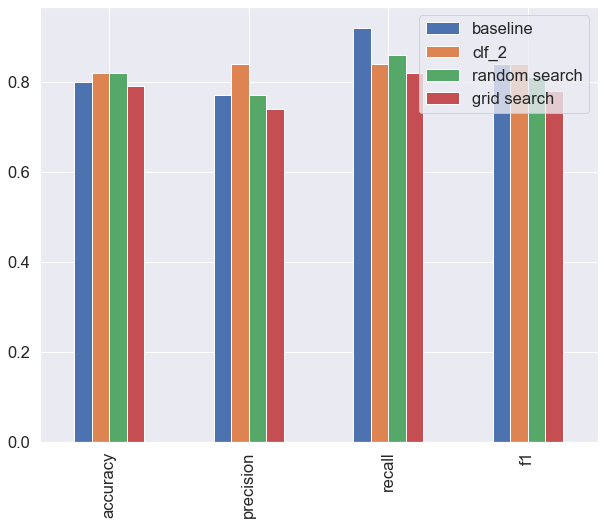

In [119]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                             "clf_2":clf_2_metrics,
                             "random search":rs_metrics,
                             "grid search":gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

## 6. Save and loading trained machine learning model

Two ways to save aand load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [120]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf,open("Model/gs_random_forest_model_1.pkl","wb"))

In [121]:
# Load a saved model
loaded_pickle_model=pickle.load(open("Model/gs_random_forest_model_1.pkl","rb"))

In [122]:
# Make some pridiction
pickle_y_preds=loaded_pickle_model.predict(X_test)
gs_metrics=evaluate_preds(y_test,pickle_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


**Joblib module**

In [123]:
from joblib import dump,load

# Save model to file
dump(gs_clf,filename="Model/gs_random_forest_model_1.joblib")

['Model/gs_random_forest_model_1.joblib']

In [124]:
# Import a saved joblib model
loaded_joblib_model=load(filename="Model/gs_random_forest_model_1.joblib")

In [125]:
# Make and evaluate joblib predictions
joblib_y_preds=loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

So, Now which one should we use:
* After training a scikit-learn model, it is desirable to have a way to persist the model for future use without having to re-train.
* `Pickle` = for small data.
* `Joblib` = for large data (large numpy arrays) as it is often the case for fitted scikit-learn estimators.

## 7. Putting it all together!!

In [126]:
data=pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [127]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## Things to remember
* All data should be numerical
* There should be no missing values
* Manipulate the test set the same as the training set
* Never test on data you've trained on
* Tune hyperparameters on validation set OR use cross-validation
* One best performance metric dosen't mean the best model

Step we want to do (all in one cell):
1. `Fill missing data`
2. `Convert data to numbers`
3. `Build a model on the data`

In [128]:
# Getting the data ready
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Import data and drop rows with missing labels
data=pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# Define different features and transformer pipeline
categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_features=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))])

numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))])

# Setup preprocessing step (fill missing values, then convert to numbers)
preprocessor=ColumnTransformer(
    transformers=[
        ("cat",categorical_transformer,categorical_features),
        ("door",door_transformer,door_features),
        ("num",numeric_transformer,numeric_features)])

# Create a preprocessing and modelling pipeline
model=Pipeline(steps=[("preprocessor",preprocessor),
                    ("model",RandomForestRegressor())])

# Split data
X=data.drop("Price",axis=1)
y=data["Price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizdeSearchCV` with our `Pipeline`

In [129]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid={
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[200,500],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]}

gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [130]:
gs_model.score(X_test,y_test)

0.3361746714392869